In [1]:
import control as ct
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

# Setup the true physical system

### Create 2nd order C.T stable transfer function (system to be identified)

The system is stable:  True


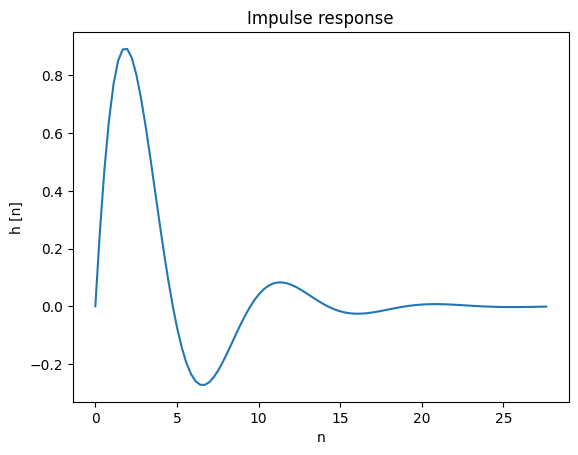

In [2]:
m = 1.0
b = 0.5
k = 0.5

num = [1.0]
den = [m,b,k]

sys_tf = ct.tf(num, den)

zp = sys_tf.pole()
stable = all([abs(p)<1 for p in zp])
print('The system is stable: ', stable)

T, h_t = ct.impulse_response(sys_tf)
plt.plot(T, h_t)
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response')
plt.show()

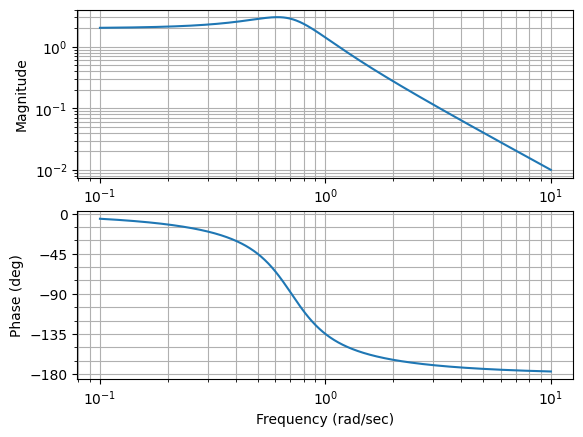

In [202]:
mag, phase, omega = ct.bode(sys_tf)

### Get D.T Ttransfer function using zero-order hold

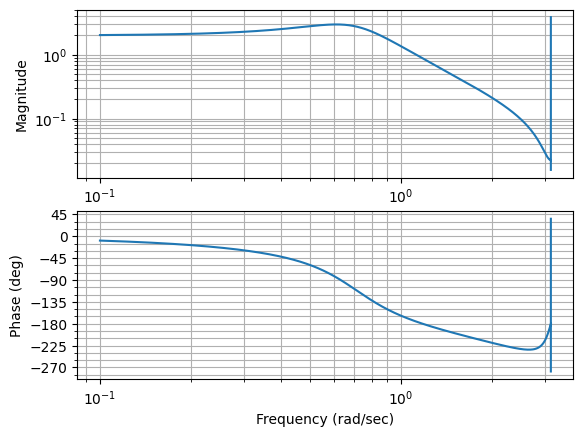

In [207]:
sys_tfd = ct.sample_system(sys_tf, 1, method='zoh')
T, h_n = ct.impulse_response(sys_tfd, T=np.arange(25))
mag, phase, omega = ct.bode(sys_tfd)

# Case 1: Impulse reponse input without noise

### Conduct experiment and measure the impulse response

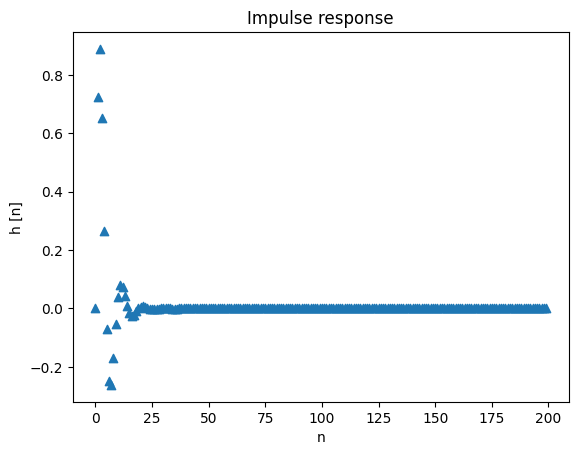

In [221]:
N = 200

T, h_n = ct.impulse_response(sys_tf, T=np.arange(N))

plt.scatter(T, h_n,  marker ="^")
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response')
plt.show()

### Compute DFT of impulse reponse to get esimated freq. response

In [222]:
dt = 1.0

T, h_n = ct.impulse_response(sys_tf, T=np.arange(1, N, dt))

f_hat = fftpack.fft(h_n)

# We consider only the first half of the frequencies(see image), the other half is just it's complex conjugate
f_hat_first_half = f_hat[:N//2]

# compute amplitude and phase
amplitude_f_hat =  np.abs(f_hat_first_half) 
phase_f_hat=  np.angle(f_hat_first_half, deg=True) 

# compute corresponding frequency values 
xf_hz = fftpack.fftfreq(N, dt)[:N//2]
xf_rad = xf_hz *2.0 * np.pi 

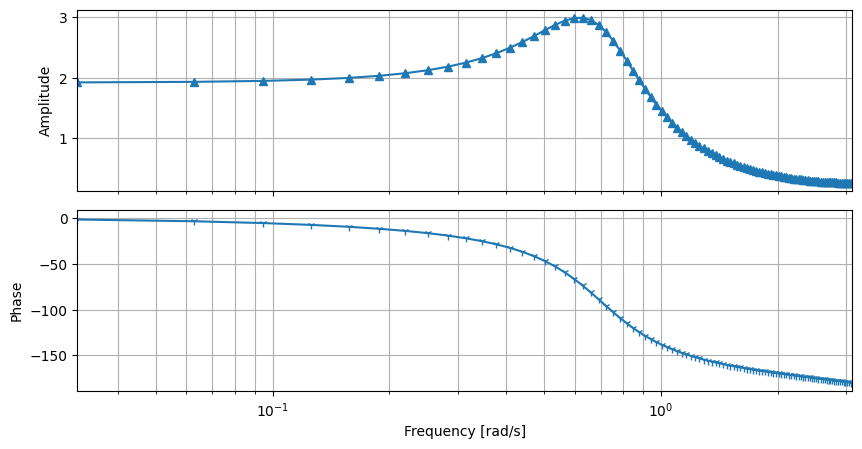

In [228]:
# Plotting
fig, axs = plt.subplots(2,1,figsize=(10,8))
fig.tight_layout()
plt.grid(True, which="both")

axs[0].plot(xf_rad, amplitude_f_hat, marker ="^")
axs[1].plot(xf_rad, phase_f_hat, marker ="1")

# axs[0].plot(t, signal, lw=3)
# axs[1].plot(t[is_greater], signal[is_greater], '*-')
axs[0].set_xscale('log')
axs[1].set_xscale('log')

# Format the plot
axs[0].set_ylabel('Amplitude')
axs[0].margins(x=0)
axs[0].set_xticklabels([])

axs[1].set_ylabel('Phase')
axs[1].set_xlabel('Frequency [rad/s]')
axs[1].margins(x=0)
# axs[1].set_xlim(0, duration)
# axs[1].set_ylim(-1.05, 1.05)


# Group the top two axes, since they have the same x-scale
axs[0].set_position([0.125, 0.75, 0.775, 0.227])
axs[1].set_position([0.125, 0.50, 0.775, 0.227])

# Save and show the figure
# out_file = 'FindingEvents.jpg'
# plt.savefig(out_file, dpi=200, quality=90)
# print(f'Image saved to {out_file}')

axs[0].grid(True, which="both")
axs[1].grid(True, which="both")
plt.show()

# Case 2: Impulse reponse input with measurement noise

### Conduct experiment and measure the impulse response

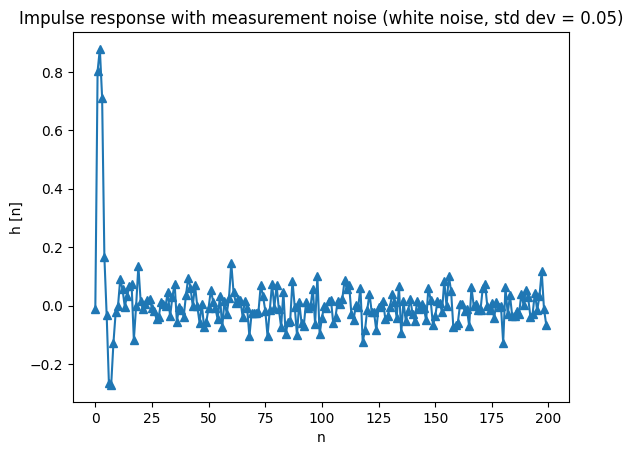

In [45]:
N = 200

# model white noise as zero mean gaussian
w_n_std_dev = 0.05
w_n = np.random.normal(0.0, w_n_std_dev, N)

# compute impulse reponse
T, h_n_ideal = ct.impulse_response(sys_tf, T=np.arange(N))

# add measurement noise
h_n_noisy = h_n_ideal + w_n                                          

plt.plot(T, h_n_noisy,  marker ="^")
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response with measurement noise (white noise, std dev = ' + str(w_n_std_dev) + ')')
plt.show()

### Compute DFT of impulse reponse to get esimated freq. response

In [46]:
dt = 1.0

T, h_n = ct.impulse_response(sys_tf, T=np.arange(1, N, dt))

f_hat = fftpack.fft(h_n_noisy)

# We consider only the first half of the frequencies(see image), the other half is just it's complex conjugate
f_hat_first_half = f_hat[:N//2]

# compute amplitude and phase
amplitude_f_hat =  np.abs(f_hat_first_half) 
phase_f_hat=  np.angle(f_hat_first_half, deg=True) 

# compute corresponding frequency values 
xf_hz = fftpack.fftfreq(N, dt)[:N//2]
xf_rad = xf_hz *2.0 * np.pi 

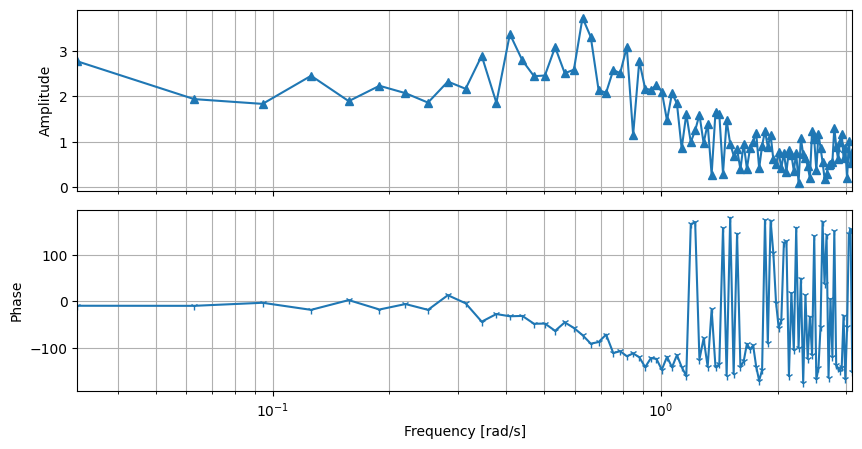

In [47]:
# Plotting
fig, axs = plt.subplots(2,1,figsize=(10,8))
fig.tight_layout()
plt.grid(True, which="both")

axs[0].plot(xf_rad, amplitude_f_hat, marker ="^")
axs[1].plot(xf_rad, phase_f_hat, marker ="1")

# axs[0].plot(t, signal, lw=3)
# axs[1].plot(t[is_greater], signal[is_greater], '*-')
axs[0].set_xscale('log')
axs[1].set_xscale('log')

# Format the plot
axs[0].set_ylabel('Amplitude')
axs[0].margins(x=0)
axs[0].set_xticklabels([])

axs[1].set_ylabel('Phase')
axs[1].set_xlabel('Frequency [rad/s]')
axs[1].margins(x=0)
# axs[1].set_xlim(0, duration)
# axs[1].set_ylim(-1.05, 1.05)


# Group the top two axes, since they have the same x-scale
axs[0].set_position([0.125, 0.75, 0.775, 0.227])
axs[1].set_position([0.125, 0.50, 0.775, 0.227])

# Save and show the figure
# out_file = 'FindingEvents.jpg'
# plt.savefig(out_file, dpi=200, quality=90)
# print(f'Image saved to {out_file}')

axs[0].grid(True, which="both")
axs[1].grid(True, which="both")
plt.show()